In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import bmf

In [2]:
test_image = plt.imread('testimage.jpg')

def rgb2gray(rgb):
    '''https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python'''
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

test_image = rgb2gray(test_image)
test_image = torch.from_numpy(test_image)
test_image = (test_image > 255/2).float()

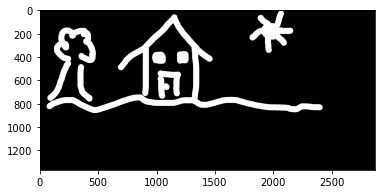

In [3]:
plt.imshow(test_image, cmap='Greys');

## Perform binary matrix factorisation

In [13]:
torch.manual_seed(1)
p, q, obj_func_values = bmf.binary_matrix_factorisation(
    test_image, 
    rank=50, # <- rank of p and q, this influences the compression factor
    lr=1e-2, 
    iterations=1000
)

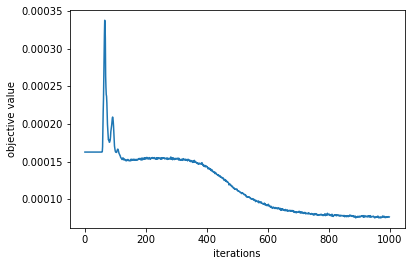

In [17]:
plt.plot(obj_func_values)
plt.xlabel('iterations')
plt.ylabel('objective value');

In [15]:
reconstruction = bmf.to_binary(p@q.T) # <- reconstruction matrix 

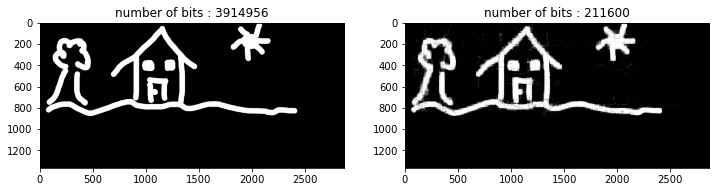

In [16]:
fig, ax = plt.subplots(1,2, figsize=(12,8))

ax[0].imshow(test_image, cmap='Greys')
ax[0].set_title(f'number of bits : {test_image.shape[0] * test_image.shape[1]}')
ax[1].imshow(reconstruction, cmap='Greys');
ax[1].set_title(f'number of bits : {q.shape[0] * q.shape[1] + p.shape[0] * p.shape[1]}');